# 01 Python标准库: datetime, time, calendar

In [1]:
from datetime import datetime

In [2]:
now = datetime.now()

In [3]:
now

datetime.datetime(2017, 7, 5, 19, 32, 48, 877596)

In [4]:
now.year, now.month, now.day

(2017, 7, 5)

In [5]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15) # 计算时间差

In [6]:
delta # 时间差: (天数, 秒数)

datetime.timedelta(926, 56700)

In [7]:
delta.days, delta.seconds

(926, 56700)

In [8]:
from datetime import timedelta # 时间差构造
start = datetime(2011, 1, 7)
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [9]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

In [10]:
stamp = datetime(2011, 1, 3)

In [11]:
str(stamp)

'2011-01-03 00:00:00'

In [12]:
value = '2011-01-03'
datetime.strptime(value, '%Y-%m-%d') # 字符串与datetime的转换

datetime.datetime(2011, 1, 3, 0, 0)

In [13]:
from dateutil.parser import parse
parse('2011-01-03') # 自动解析日期格式

datetime.datetime(2011, 1, 3, 0, 0)

# 02 时间序列数据结构: Series

In [14]:
dates = [datetime(2011,1,2), datetime(2011,1,5), datetime(2011,1,7), 
         datetime(2011,1,8), datetime(2011,1,10), datetime(2011,1,12)]

In [15]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
ts = Series(np.random.randn(6), index=dates) # Series: 一组数据和时间索引

In [16]:
ts

2011-01-02    0.426461
2011-01-05   -1.948333
2011-01-07    0.560551
2011-01-08   -0.370565
2011-01-10    0.785634
2011-01-12   -1.499193
dtype: float64

In [17]:
type(ts)

pandas.core.series.Series

In [18]:
ts.index # 访问索引, 数据类型为datetime64[ns]

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [19]:
ts[::2] # 步长为2

2011-01-02    0.426461
2011-01-07    0.560551
2011-01-10    0.785634
dtype: float64

In [20]:
ts + ts[::2] # 按日期对齐

2011-01-02    0.852922
2011-01-05         NaN
2011-01-07    1.121103
2011-01-08         NaN
2011-01-10    1.571269
2011-01-12         NaN
dtype: float64

In [21]:
ts.index.dtype

dtype('<M8[ns]')

In [22]:
stamp = ts.index[0]

In [23]:
stamp # 索引元素为pandas的Timestamp对象

Timestamp('2011-01-02 00:00:00')

## TimeSeries的索引, 选取和子集构造

In [24]:
ts

2011-01-02    0.426461
2011-01-05   -1.948333
2011-01-07    0.560551
2011-01-08   -0.370565
2011-01-10    0.785634
2011-01-12   -1.499193
dtype: float64

In [25]:
stamp = ts.index[2]

In [26]:
ts[stamp] # 访问值: 使用索引中元素

0.5605512693378033

In [27]:
ts['2011-01-07'], ts['20110107'] # 访问值: 使用索引中元素的字符串表示

(0.5605512693378033, 0.5605512693378033)

In [28]:
longer_ts = Series(np.random.randn(1000), 
                   index=pd.date_range('2000-01-01', periods=1000)) # 使用日期的range()方法

In [29]:
longer_ts['2000-01'] # 只传入年或者年月做slice

2000-01-01    0.378855
2000-01-02   -0.222037
2000-01-03   -1.779100
2000-01-04    0.573391
2000-01-05   -0.554826
2000-01-06    0.509356
2000-01-07   -1.059394
2000-01-08   -0.796558
2000-01-09   -0.791713
2000-01-10    0.184419
2000-01-11   -1.025555
2000-01-12    1.147498
2000-01-13    0.837699
2000-01-14   -0.887327
2000-01-15   -0.385942
2000-01-16    0.544121
2000-01-17   -0.547992
2000-01-18    0.650524
2000-01-19    2.113015
2000-01-20   -0.197979
2000-01-21   -0.653470
2000-01-22    0.366394
2000-01-23    0.108444
2000-01-24    1.211179
2000-01-25   -0.923274
2000-01-26    1.236739
2000-01-27   -1.682055
2000-01-28    1.952130
2000-01-29   -0.154708
2000-01-30   -0.780025
2000-01-31    1.322783
Freq: D, dtype: float64

In [30]:
ts

2011-01-02    0.426461
2011-01-05   -1.948333
2011-01-07    0.560551
2011-01-08   -0.370565
2011-01-10    0.785634
2011-01-12   -1.499193
dtype: float64

In [31]:
ts[datetime(2011, 1, 7):] # 使用datetime值做slice

2011-01-07    0.560551
2011-01-08   -0.370565
2011-01-10    0.785634
2011-01-12   -1.499193
dtype: float64

In [32]:
ts['1/6/2011':'1/11/2011'] # 使用索引中元素字符串形式做slice

2011-01-07    0.560551
2011-01-08   -0.370565
2011-01-10    0.785634
dtype: float64

In [33]:
ts.truncate(after='2011-01-08') # 截取: 不晚于指定日期

2011-01-02    0.426461
2011-01-05   -1.948333
2011-01-07    0.560551
2011-01-08   -0.370565
dtype: float64

In [34]:
# DataFrame
dates = pd.date_range('2000-01-01', periods=100, frep='W-WED')
dates

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14', '2000-01-15', '2000-01-16',
               '2000-01-17', '2000-01-18', '2000-01-19', '2000-01-20',
               '2000-01-21', '2000-01-22', '2000-01-23', '2000-01-24',
               '2000-01-25', '2000-01-26', '2000-01-27', '2000-01-28',
               '2000-01-29', '2000-01-30', '2000-01-31', '2000-02-01',
               '2000-02-02', '2000-02-03', '2000-02-04', '2000-02-05',
               '2000-02-06', '2000-02-07', '2000-02-08', '2000-02-09',
               '2000-02-10', '2000-02-11', '2000-02-12', '2000-02-13',
               '2000-02-14', '2000-02-15', '2000-02-16', '2000-02-17',
               '2000-02-18', '2000-02-19', '2000-02-20', '2000-02-21',
               '2000-02-22', '2000-02-23', '2000-02-24', '2000-02-25',
      

In [35]:
long_df = DataFrame(np.random.randn(100,4), 
                   index = dates,
                   columns=['Colorado', 'Texas', 'New York', 'Ohio'])
# 访问DataFrame的行
#long_df.ix['2000'] # ix已废弃
#long_df['2000']
long_df['2000-01']

,Colorado,Texas,New York,Ohio
2000-01-01,-0.126245,0.168435,-1.733151,1.765007
2000-01-02,0.115920,-0.211759,-0.226901,-0.393976
2000-01-03,0.439751,-0.929050,-1.282269,-1.308723
2000-01-04,-2.381521,0.279062,0.732651,-1.506106
2000-01-05,0.965661,0.606854,-0.072892,-0.102745
2000-01-06,-0.004437,-0.623743,0.219530,-1.750104
2000-01-07,-1.071901,0.395829,-1.479396,2.191205
2000-01-08,-1.452526,2.264162,-0.102347,-0.123704
2000-01-09,0.011049,-1.137329,0.152852,-0.647435
2000-01-10,-0.471703,-1.418031,0.344739,-1.098290


In [36]:
# 带重复索引的时间序列
dates = pd.DatetimeIndex(['2000-01-01','2000-01-02','2000-01-02','2000-01-02','2000-01-03'])
dup_ts = Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

In [37]:
dup_ts.index.is_unique # 判断索引取值是否唯一

False

In [38]:
dup_ts['20000103'] # 标量值

4

In [39]:
dup_ts['1/2/2000'] # 切片

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

In [40]:
grouped = dup_ts.groupby(level=0) # 聚合
grouped

In [41]:
grouped.mean(), grouped.count()

(2000-01-01    0
 2000-01-02    2
 2000-01-03    4
 dtype: int64, 2000-01-01    1
 2000-01-02    3
 2000-01-03    1
 dtype: int64)

# 03 日期的范围, 频率和移动

In [42]:
ts

2011-01-02    0.426461
2011-01-05   -1.948333
2011-01-07    0.560551
2011-01-08   -0.370565
2011-01-10    0.785634
2011-01-12   -1.499193
dtype: float64

In [43]:
# 重采样, 转化为具有固定频率的时间序列
# .resample() is now a deferred operation
ts_reample_as_day = ts.resample('D')
ts_reample_as_day

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]

In [44]:
ts_reample_as_day.agg({value: lambda x: x}) #  自定义聚合函数: 显示值

2011-01-03  2011-01-02    0.426461
            2011-01-03          []
            2011-01-04          []
            2011-01-05    -1.94833
            2011-01-06          []
            2011-01-07    0.560551
            2011-01-08   -0.370565
            2011-01-09          []
            2011-01-10    0.785634
            2011-01-11          []
            2011-01-12    -1.49919
dtype: object

## 日期范围

In [45]:
index = pd.date_range('2012-04-01', '2012-06-01') # 默认频率为天
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [46]:
pd.date_range(start='2012-04-01', periods=20) # 使用period指定日期数量

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [47]:
pd.date_range(end='2012-04-01', periods=20)

DatetimeIndex(['2012-03-13', '2012-03-14', '2012-03-15', '2012-03-16',
               '2012-03-17', '2012-03-18', '2012-03-19', '2012-03-20',
               '2012-03-21', '2012-03-22', '2012-03-23', '2012-03-24',
               '2012-03-25', '2012-03-26', '2012-03-27', '2012-03-28',
               '2012-03-29', '2012-03-30', '2012-03-31', '2012-04-01'],
              dtype='datetime64[ns]', freq='D')

In [48]:
pd.date_range('2000-01-01', '2000-12-01', freq='BM') # 指定频率

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [49]:
pd.date_range('2012-05-02 12:56:31', periods=5) # 保留时间戳信息

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [50]:
pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True) # 不保留时间戳信息

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

## 频率和日期偏移

In [51]:
from pandas.tseries.offsets import Hour, Minute # 基础频率对应的日期偏移量对象

In [52]:
hour = Hour()
hour

<Hour>

In [53]:
four_hour = Hour(4)
four_hour

<4 * Hours>

In [54]:
pd.date_range('2000-01-01', '2000-01-03 23:59', freq='4h')# 频率由基础频率和乘数构成

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [55]:
Hour(2) + Minute(30) # 偏移量对象加法

<150 * Minutes>

In [56]:
pd.date_range('2000-01-01', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

In [57]:
# WOM: Week of Month
rng = pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI') # 每月的第3个星期五
rng

DatetimeIndex(['2012-01-20', '2012-02-17', '2012-03-16', '2012-04-20',
               '2012-05-18', '2012-06-15', '2012-07-20', '2012-08-17'],
              dtype='datetime64[ns]', freq='WOM-3FRI')

## 数据移动和日期移动

In [58]:
ts = Series(np.random.randn(4), index=pd.date_range('2000-01-01', periods=4, freq='M'))

In [59]:
ts

2000-01-31   -0.413917
2000-02-29    0.795399
2000-03-31    2.061439
2000-04-30   -0.814525
Freq: M, dtype: float64

In [60]:
ts.shift(2) # 数据前移2个位置

2000-01-31         NaN
2000-02-29         NaN
2000-03-31   -0.413917
2000-04-30    0.795399
Freq: M, dtype: float64

In [61]:
ts.shift(-2) # 数据后移2个位置

2000-01-31    2.061439
2000-02-29   -0.814525
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [62]:
# 仅移动时间戳, 数据保持不变
ts.shift(2, freq='M')

2000-03-31   -0.413917
2000-04-30    0.795399
2000-05-31    2.061439
2000-06-30   -0.814525
Freq: M, dtype: float64

In [63]:
# 使用偏移量移动时间戳
from pandas.tseries.offsets import Day, MonthEnd
now = datetime(2011,11,17)

In [64]:
now + Day(3)

Timestamp('2011-11-20 00:00:00')

In [65]:
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [66]:
offset = MonthEnd()
offset.rollforward(now) # now的月末

Timestamp('2011-11-30 00:00:00')

In [67]:
offset.rollback(now) # now的前一个月末

Timestamp('2011-10-31 00:00:00')

In [68]:
# 使用Series.groupby()
ts = Series(np.random.randn(20), index=pd.date_range('2000-01-15', periods=20, freq='4d'))
ts

2000-01-15   -0.032497
2000-01-19    0.784286
2000-01-23   -0.108205
2000-01-27    1.669108
2000-01-31   -0.437032
2000-02-04    1.511443
2000-02-08   -1.140545
2000-02-12    0.204821
2000-02-16    0.219377
2000-02-20    0.489812
2000-02-24   -1.106664
2000-02-28    0.161609
2000-03-03   -0.145336
2000-03-07   -1.618507
2000-03-11    0.689838
2000-03-15   -1.075976
2000-03-19    0.064178
2000-03-23    0.797917
2000-03-27   -0.375784
2000-03-31   -0.206015
Freq: 4D, dtype: float64

In [69]:
ts.groupby(MonthEnd().rollforward).mean() # groupby传入的是函数

2000-01-31    0.375132
2000-02-29    0.048550
2000-03-31   -0.233711
dtype: float64

In [70]:
ts.resample('M').mean() # 与上例等价的方式

2000-01-31    0.375132
2000-02-29    0.048550
2000-03-31   -0.233711
Freq: M, dtype: float64

# 04 时期(Period)

In [71]:
p = pd.Period(2007, freq='A-DEC') # 非重叠的时间区间
p

Period('2007', 'A-DEC')

In [72]:
p + 5, p - 2 # 时期移动

(Period('2012', 'A-DEC'), Period('2005', 'A-DEC'))

In [73]:
pd.Period('2014', freq='A-DEC') - p # 同频率的时期相减

7

In [74]:
# 时期范围: 返回PeriodIndex
rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [75]:
# 将PeriodIndex作为pandas数据结构的索引
Series(np.random.randn(6), index=rng)

2000-01    0.104118
2000-02   -0.109428
2000-03    0.080804
2000-04   -0.525285
2000-05   -0.342645
2000-06    0.592762
Freq: M, dtype: float64

In [76]:
pd.PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], freq='Q-DEC') # PeriodIndex构造

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

## 时期的频率转换

In [77]:
p = pd.Period('2007', freq='A-DEC') # 2007-01-01 ~ 2007-12-31

In [78]:
p.asfreq('M', how='start')

Period('2007-01', 'M')

In [79]:
p.asfreq('M', how='end')

Period('2007-12', 'M')

In [80]:
p2 = pd.Period('2007', freq='A-JUN') # 2007年以JUN为末月, 2007-08则属于2008年

In [81]:
p2.asfreq('M', how='start')

Period('2006-07', 'M')

In [82]:
p2.asfreq('M', how='end')

Period('2007-06', 'M')

In [83]:
# 在TimeSeries上转换频率
rng = pd.period_range('2006', '2009', freq='A-DEC')
ts = Series(np.random.randn(len(rng)), index=rng)
ts

2006    0.106720
2007    1.263004
2008    1.866222
2009   -0.659062
Freq: A-DEC, dtype: float64

In [84]:
ts.asfreq('M', how='start')

2006-01    0.106720
2007-01    1.263004
2008-01    1.866222
2009-01   -0.659062
Freq: M, dtype: float64

In [85]:
ts.asfreq('M', how='end')

2006-12    0.106720
2007-12    1.263004
2008-12    1.866222
2009-12   -0.659062
Freq: M, dtype: float64

## WARNNING: 按季度计算的时期频率 暂不考虑

## Timestamp与Period之间的转换

In [86]:
# to_period: Series/DataFrame将时间戳索引转换为时期索引
rng = pd.date_range('2000-01-01', periods=3, freq='M')
ts = Series(np.random.randn(3), index=rng)
pts = ts.to_period() # PeriodIndex的频率默认从时间戳推断

In [87]:
ts

2000-01-31    0.419492
2000-02-29    0.454191
2000-03-31    0.668941
Freq: M, dtype: float64

In [88]:
pts

2000-01    0.419492
2000-02    0.454191
2000-03    0.668941
Freq: M, dtype: float64

In [89]:
rng = pd.date_range('2000-01-29', periods=6, freq='D')
ts2= Series(np.random.randn(6), index=rng)
ts2

2000-01-29   -0.351769
2000-01-30   -1.256634
2000-01-31    0.926326
2000-02-01   -0.119488
2000-02-02   -1.621227
2000-02-03    1.689099
Freq: D, dtype: float64

In [90]:
ts2.to_period('M') # 指定PeriodIndex的频率, 注意: 结果中存在重复的时期

2000-01   -0.351769
2000-01   -1.256634
2000-01    0.926326
2000-02   -0.119488
2000-02   -1.621227
2000-02    1.689099
Freq: M, dtype: float64

In [91]:
pts

2000-01    0.419492
2000-02    0.454191
2000-03    0.668941
Freq: M, dtype: float64

In [92]:
pts.to_timestamp(how='end') # 时期索引转换为时间戳索引

2000-01-31    0.419492
2000-02-29    0.454191
2000-03-31    0.668941
Freq: M, dtype: float64

In [93]:
pts.to_timestamp(how='start')

2000-01-01    0.419492
2000-02-01    0.454191
2000-03-01    0.668941
Freq: MS, dtype: float64

# 05 重采样和频率转换

In [94]:
# 重采样(resampling): 将时间序列从一个频率转换为另一频率
rng = pd.date_range('2000-01-01', periods=100, freq='D')
ts  = Series(np.random.randn(len(rng)), index=rng)
ts[:5]

2000-01-01    0.310548
2000-01-02    0.954557
2000-01-03    0.480413
2000-01-04    0.403546
2000-01-05   -0.749517
Freq: D, dtype: float64

In [95]:
ts.resample('M').mean() # 每月最后一个日历日

2000-01-31    0.305938
2000-02-29   -0.036158
2000-03-31    0.100153
2000-04-30    0.023193
Freq: M, dtype: float64

In [96]:
ts.resample('M', kind='period').mean() # 聚合到时期, 默认聚合到时间序列的索引类型

2000-01    0.305938
2000-02   -0.036158
2000-03    0.100153
2000-04    0.023193
Freq: M, dtype: float64

In [97]:
ts.resample('M', kind='timestamp').mean()  # 聚合到时间戳, 默认聚合到时间序列的索引类型

2000-01-31    0.305938
2000-02-29   -0.036158
2000-03-31    0.100153
2000-04-30    0.023193
Freq: M, dtype: float64

## 降采样(downsampling): 高频=>低频(天->月)

In [98]:
rng = pd.date_range('2000-01-01', periods=12, freq='T') # 1分钟
ts = Series(np.arange(12), index=rng)

In [99]:
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int64

In [100]:
# 5分钟, 聚合函数为求和
# 时间段是半开放的, closed参数标记各区间哪边是闭合的
# label参数表示是用时段区间的开头还是末尾标记聚合后的面元
# 例: 9:00 9:01 9:02 9:03 9:04 9:05
# label=left: [9:00] -> 9:05
# label=right: 9:00 <- [9:05]
# closed=left: [9:00, 9:05)
# closed=right: (9:00, 9:05]
ts.resample('5min').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int64

In [101]:
ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int64

In [102]:
ts.resample('5min', closed='left', label='left').sum() # 与默认值相同

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int64

## 升采样(upsampling): 低频=>高频(天->分钟)

In [103]:
frame = DataFrame(np.random.randn(2,4),
                 index=pd.date_range('2000-01-01', periods=2, freq='W-WED'),
                 columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,1.231006,0.145847,-1.060481,-0.287240
2000-01-12,-1.401895,0.470163,0.631268,0.133105


In [104]:
# 将采样频率转换为天
frame_daily = frame.resample('D')
frame_daily.agg({value: lambda x: x})

/Users/jiedong/Library/Python/3.5/lib/python/site-packages/ipykernel_launcher.py:3: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


2011-01-03                              
             Colorado     Texas  New York      Ohio
2000-01-05    1.23101  0.145847  -1.06048  -0.28724
2000-01-06         []        []        []        []
2000-01-07         []        []        []        []
2000-01-08         []        []        []        []
2000-01-09         []        []        []        []
2000-01-10         []        []        []        []
2000-01-11         []        []        []        []
2000-01-12    -1.4019  0.470163  0.631268  0.133105

In [105]:
# 填充, ffill使用前面的值填充, limit限制填充值的数量
# frame.resample('D', fill_method='ffill', limit=2) # deprecated
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,1.231006,0.145847,-1.060481,-0.287240
2000-01-06,1.231006,0.145847,-1.060481,-0.287240
2000-01-07,1.231006,0.145847,-1.060481,-0.287240
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-1.401895,0.470163,0.631268,0.133105


## 使用时期进行重采样

In [106]:
frame = DataFrame(np.random.randn(24,4),
                 index=pd.period_range('2000-01', '2001-12', freq='M'), # 时期索引
                 columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame[::5]

,Colorado,Texas,New York,Ohio
2000-01,0.524024,0.215384,1.123490,0.232455
2000-06,1.013009,-0.573514,-0.566958,-1.289872
2000-11,0.156301,0.425767,-2.358875,0.826619
2001-04,0.266567,-0.055785,0.490698,1.771778
2001-09,-1.258070,-1.589188,-0.076405,0.762766


In [107]:
frame.resample('A-DEC').mean()

,Colorado,Texas,New York,Ohio
2000,-0.022281,-0.022990,-0.487209,0.264936
2001,-0.061733,-0.439277,0.186779,-0.012334


# 06 时间序列绘图

In [108]:
# 内联设置
%matplotlib inline

In [109]:
close_px_all = pd.read_csv('data/stock_px.csv', parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B').ffill()
close_px[:5]

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83


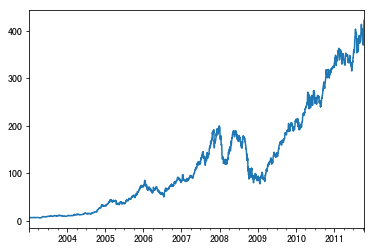

In [110]:
close_px['AAPL'].plot() # 单列

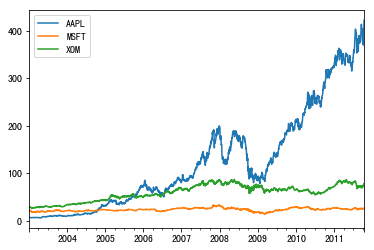

In [111]:
close_px.plot() # 所有列

/Users/jiedong/Library/Python/3.5/lib/python/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


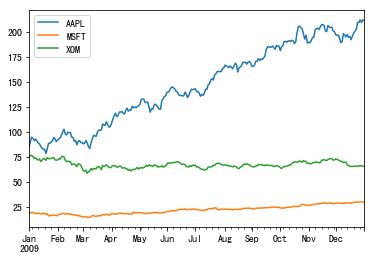

In [112]:
close_px.ix['2009'].plot() # 选取2009年的数据行

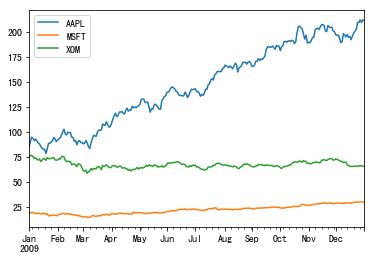

In [113]:
close_px.loc['2009'].plot() # 同上

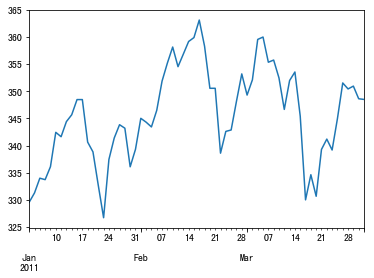

In [114]:
close_px['AAPL'].loc['2011-01':'2011-03'].plot() # 筛选时期

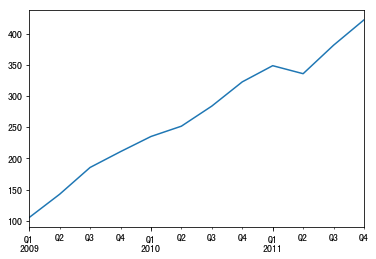

In [115]:
close_px['AAPL'].resample('Q-DEC').ffill().loc['2009':].plot()

## 07 移动窗口函数(moving window function)

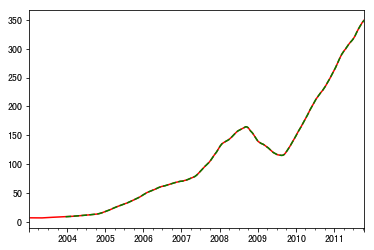

In [116]:
#close_px['AAPL'].plot()
# 移动平均值
#pd.rolling_mean(close_px['AAPL'], 250).plot() # deprecated
# window表示期, min_periods表示窗口中非NA的数据数量
close_px['AAPL'].rolling(center=False, window=250, min_periods=10).mean().plot(style=['r'])
close_px['AAPL'].rolling(center=False, window=250).mean().plot(style='g--') 

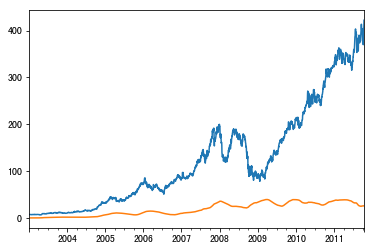

In [117]:
close_px['AAPL'].plot()
# 移动标准差
close_px['AAPL'].rolling(center=False, window=250, min_periods=10).std().plot()

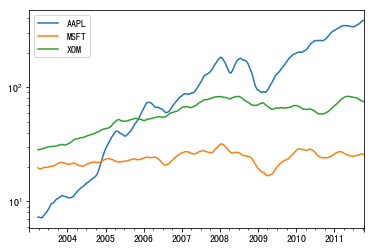

In [118]:
# 应用到所有列上
close_px.rolling(window=60).mean().plot(logy=True)

## 指数加权: 使近期的观测值有更大的权重

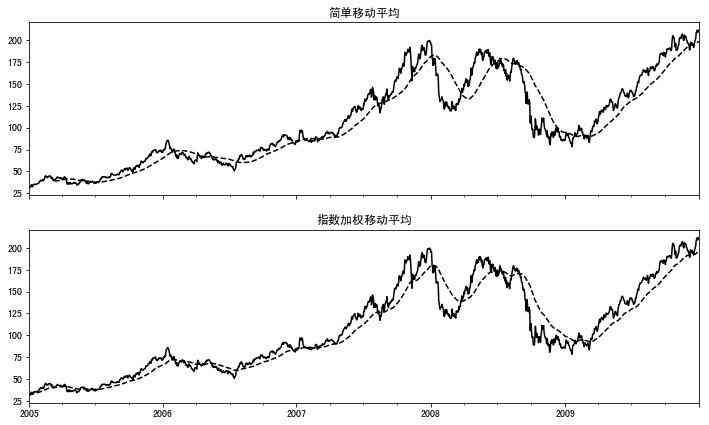

In [119]:
# 包引用
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=2,ncols=1,
                         sharex=True,sharey=True,
                        figsize=(12,7))
appl_px = close_px['AAPL']['2005':'2009']
ma = appl_px.rolling(window=60, min_periods=50).mean() # 简单移动平均
ewma = appl_px.ewm(span=60).mean() # 指数加权移动平均

appl_px.plot(style='k-', ax=axes[0])
ma.plot(style='k--', ax=axes[0])
axes[0].set_title(u'简单移动平均')

appl_px.plot(style='k-', ax=axes[1])
ewma.plot(style='k--', ax=axes[1])
axes[1].set_title(u'指数加权移动平均')

## 二元移动窗口函数: 计算相关系数和协方差等

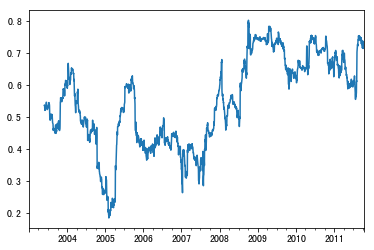

In [120]:
spx_px = close_px_all['SPX']
spx_rets = spx_px / spx_px.shift(1) - 1
returns = close_px.pct_change() # 百分数变化
returns['AAPL'].rolling(window=125, min_periods=100).corr(spx_rets).plot() # 协方差

## 用户自定义的移动窗口函数: 在窗口内数据序列上应用结果为标量的函数

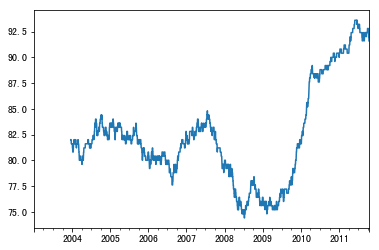

In [121]:
from scipy.stats import percentileofscore
score_at_2percent = lambda x : percentileofscore(x, 0.02) # 2%分位处的值
returns['AAPL'].rolling(window=250).apply(score_at_2percent).plot()